# (kosis)
# 1인당 개인소득, 1인당 총지역소득, GRDP
# 가구 부채, 가구 자산
# 백화점판매액, 대형소매점판매액
# 예금은행 대출금액, 예금액
# 농가수, 어가수, 지방세

# 아래 항목은 제외함.
# 재정자립도, 재정자주도
# 제조업사업체수, 제조업종사자수


In [1]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
# personalIncome = pd.read_csv("../../Data/sanghyuklee/1인당_개인소득_시도_2000-2021(단위천원).csv",encoding='euc-kr')
# personalIncome # 1인당 개인소득 단위:천원

,시점,시도별,데이터
0,2000,전국,8694
1,2000,서울특별시,9978
2,2000,부산광역시,8296
3,2000,대구광역시,8274
4,2000,인천광역시,7651
...,...,...,...
378,2021 p),전라북도,20862
379,2021 p),전라남도,20881
380,2021 p),경상북도,20667
381,2021 p),경상남도,20650


In [3]:
# personalIncome.columns

Index(['시점', '시도별', '데이터'], dtype='object')

In [4]:
# personalIncome.columns = ['년도','시도','1인당개인소득']

In [5]:
# perIncome=personalIncome[personalIncome.시도 != '전국'][208:]
# perIncome

,년도,시도,1인당개인소득
222,2013,서울특별시,19525
223,2013,부산광역시,15651
224,2013,대구광역시,15320
225,2013,인천광역시,14829
226,2013,광주광역시,15454
...,...,...,...
378,2021 p),전라북도,20862
379,2021 p),전라남도,20881
380,2021 p),경상북도,20667
381,2021 p),경상남도,20650


In [6]:
# perIncome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 222 to 382
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   년도       153 non-null    object
 1   시도       153 non-null    object
 2   1인당개인소득  153 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [7]:
# perIncome = perIncome.replace('2021 p)','2021')

In [8]:
# perIncome

,년도,시도,1인당개인소득
222,2013,서울특별시,19525
223,2013,부산광역시,15651
224,2013,대구광역시,15320
225,2013,인천광역시,14829
226,2013,광주광역시,15454
...,...,...,...
378,2021,전라북도,20862
379,2021,전라남도,20881
380,2021,경상북도,20667
381,2021,경상남도,20650


In [9]:
df = pd.read_csv("../../Data/sangwonKim/population_job_01.csv")
df

,년도,시도,총 인구,남성 인구,여성 인구
0,2013,서울특별시,10143645,5007869,5135776
1,2013,부산광역시,3527635,1747000,1780635
2,2013,대구광역시,2501588,1246071,1255517
3,2013,인천광역시,2879782,1448835,1430947
4,2013,광주광역시,1472910,730216,742694
...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015
166,2022,전라남도,1817697,915272,902425
167,2022,경상북도,2600492,1311881,1288611
168,2022,경상남도,3280493,1651675,1628818


In [10]:
# df_2021 = df[:153]

In [11]:
# perIncome.reset_index()

,index,년도,시도,1인당개인소득
0,222,2013,서울특별시,19525
1,223,2013,부산광역시,15651
2,224,2013,대구광역시,15320
3,225,2013,인천광역시,14829
4,226,2013,광주광역시,15454
...,...,...,...,...
148,378,2021,전라북도,20862
149,379,2021,전라남도,20881
150,380,2021,경상북도,20667
151,381,2021,경상남도,20650


In [12]:
# perIncome.시도.unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [13]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      153 non-null    int64 
 1   시도      153 non-null    object
 2   총 인구    153 non-null    int64 
 3   남성 인구   153 non-null    int64 
 4   여성 인구   153 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.1+ KB


In [14]:
df_2021.시도.unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [15]:
# perIncome.년도 = perIncome.년도.astype(int)

In [16]:
# mergePerIncome = pd.merge(df_2021,perIncome,how='left', on=['년도','시도'])
# mergePerIncome

,년도,시도,총 인구,남성 인구,여성 인구,1인당개인소득
0,2013,서울특별시,10143645,5007869,5135776,19525
1,2013,부산광역시,3527635,1747000,1780635,15651
2,2013,대구광역시,2501588,1246071,1255517,15320
3,2013,인천광역시,2879782,1448835,1430947,14829
4,2013,광주광역시,1472910,730216,742694,15454
...,...,...,...,...,...,...
148,2021,전라북도,1786855,888994,897861,20862
149,2021,전라남도,1832803,922221,910582,20881
150,2021,경상북도,2626609,1323661,1302948,20667
151,2021,경상남도,3314183,1668338,1645845,20650


In [17]:
import matplotlib.pyplot as plt


In [18]:
# mergePerIncome[mergePerIncome.시도 == '강원도']['1인당개인소득']

9      14394
26     15152
43     16311
60     16798
77     17484
94     18450
111    19174
128    20267
145    21038
Name: 1인당개인소득, dtype: int64

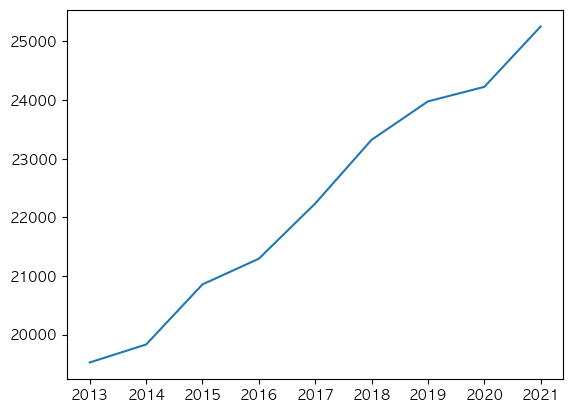

In [19]:
# plt.plot( mergePerIncome[mergePerIncome.시도 == '서울특별시'].년도, mergePerIncome[mergePerIncome.시도 == '서울특별시']['1인당개인소득'] )

In [20]:
# personalTotalIncome = pd.read_csv("../../Data/sanghyuklee/1인당_지역총소득_시도_2000-2021(단위천원).csv",encoding='euc-kr')
# personalTotalIncome # 1인당 개인소득 단위:천원

,시점,시도별,데이터
0,2000,전국,13860
1,2000,서울특별시,17194
2,2000,부산광역시,10933
3,2000,대구광역시,10684
4,2000,인천광역시,10633
...,...,...,...
378,2021 p),전라북도,31157
379,2021 p),전라남도,38857
380,2021 p),경상북도,38000
381,2021 p),경상남도,32968


In [21]:
# personalTotalIncome.columns = ['시점','시도별','1인당지역총소득']

In [22]:
# personalTotalIncome 

,시점,시도별,1인당지역총소득
0,2000,전국,13860
1,2000,서울특별시,17194
2,2000,부산광역시,10933
3,2000,대구광역시,10684
4,2000,인천광역시,10633
...,...,...,...
378,2021 p),전라북도,31157
379,2021 p),전라남도,38857
380,2021 p),경상북도,38000
381,2021 p),경상남도,32968


In [23]:
# personalTotalIncome.columns
df

,년도,시도,총 인구,남성 인구,여성 인구
0,2013,서울특별시,10143645,5007869,5135776
1,2013,부산광역시,3527635,1747000,1780635
2,2013,대구광역시,2501588,1246071,1255517
3,2013,인천광역시,2879782,1448835,1430947
4,2013,광주광역시,1472910,730216,742694
...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015
166,2022,전라남도,1817697,915272,902425
167,2022,경상북도,2600492,1311881,1288611
168,2022,경상남도,3280493,1651675,1628818


In [24]:
# personalTotalIncome = personalTotalIncome.replace('2021 p)','2021')

In [25]:
# personalTotalIncome.columns = ['년도','시도','1인당지역총소득']


In [26]:
# personalTotalIncome

,년도,시도,1인당지역총소득
0,2000,전국,13860
1,2000,서울특별시,17194
2,2000,부산광역시,10933
3,2000,대구광역시,10684
4,2000,인천광역시,10633
...,...,...,...
378,2021,전라북도,31157
379,2021,전라남도,38857
380,2021,경상북도,38000
381,2021,경상남도,32968


In [27]:
# personalTotalIncome.년도 = personalTotalIncome.년도.astype(int)

In [28]:
# mergePerIncome = pd.merge(mergePerIncome,personalTotalIncome,how='left', on=['년도','시도'])
# mergePerIncome

,년도,시도,총 인구,남성 인구,여성 인구,1인당개인소득,1인당지역총소득
0,2013,서울특별시,10143645,5007869,5135776,19525,39570
1,2013,부산광역시,3527635,1747000,1780635,15651,23500
2,2013,대구광역시,2501588,1246071,1255517,15320,21992
3,2013,인천광역시,2879782,1448835,1430947,14829,25483
4,2013,광주광역시,1472910,730216,742694,15454,22992
...,...,...,...,...,...,...,...
148,2021,전라북도,1786855,888994,897861,20862,31157
149,2021,전라남도,1832803,922221,910582,20881,38857
150,2021,경상북도,2626609,1323661,1302948,20667,38000
151,2021,경상남도,3314183,1668338,1645845,20650,32968


In [29]:
# mergePerIncome.tail(20)

,년도,시도,총 인구,남성 인구,여성 인구,1인당개인소득,1인당지역총소득
133,2020,경상북도,2639422,1329211,1310211,19798,35471
134,2020,경상남도,3340216,1681423,1658793,19759,31550
135,2020,제주특별자치도,674635,338609,336026,19954,30030
136,2021,서울특별시,9509458,4618040,4891418,25256,54209
137,2021,부산광역시,3350380,1639044,1711336,21352,32014
138,2021,대구광역시,2385412,1175632,1209780,21046,29353
139,2021,인천광역시,2948375,1476373,1472002,21317,35818
140,2021,광주광역시,1441611,713015,728596,22472,32999
141,2021,대전광역시,1452251,724626,727625,22730,33810
142,2021,울산광역시,1121592,576217,545375,25165,59346


In [30]:
# GRDP = pd.read_csv("../../Data/sanghyuklee/GRDP_시도_2010-2019(단위백만원).csv",encoding='euc-kr')
# GRDP # GRDP 단위:백만원

,경제활동별(1),시점,시도별(1),실질
0,지역내총생산(시장가격),1985,서울특별시,77310769
1,지역내총생산(시장가격),1985,부산광역시,21773910
2,지역내총생산(시장가격),1985,대구광역시,13889560
3,지역내총생산(시장가격),1985,인천광역시,13731212
4,지역내총생산(시장가격),1985,경기도,35376012
...,...,...,...,...
577,지역내총생산(시장가격),2021 p),전라북도,50398818
578,지역내총생산(시장가격),2021 p),전라남도,77027126
579,지역내총생산(시장가격),2021 p),경상북도,104960491
580,지역내총생산(시장가격),2021 p),경상남도,105347557


In [31]:
# GRDP

,경제활동별(1),시점,시도별(1),실질
0,지역내총생산(시장가격),1985,서울특별시,77310769
1,지역내총생산(시장가격),1985,부산광역시,21773910
2,지역내총생산(시장가격),1985,대구광역시,13889560
3,지역내총생산(시장가격),1985,인천광역시,13731212
4,지역내총생산(시장가격),1985,경기도,35376012
...,...,...,...,...
577,지역내총생산(시장가격),2021 p),전라북도,50398818
578,지역내총생산(시장가격),2021 p),전라남도,77027126
579,지역내총생산(시장가격),2021 p),경상북도,104960491
580,지역내총생산(시장가격),2021 p),경상남도,105347557


In [32]:
# GRDP = GRDP.iloc[:,1:]

In [33]:
# GRDP.columns = ['년도','시도','GRDP']
# GRDP.columns

Index(['년도', '시도', 'GRDP'], dtype='object')

In [34]:
# GRDP[GRDP.년도 == 2013]

,년도,시도,GRDP


In [35]:
# GRDP[GRDP.시도=='세종특별자치시']

,년도,시도,GRDP
436,2013,세종특별자치시,6883305
453,2014,세종특별자치시,8635120
470,2015,세종특별자치시,9261543
487,2016,세종특별자치시,9729904
504,2017,세종특별자치시,10140164
521,2018,세종특별자치시,10423610
538,2019,세종특별자치시,11091040
555,2020,세종특별자치시,11647981
572,2021 p),세종특별자치시,12489323


In [36]:
# GRDP.columns

Index(['년도', '시도', 'GRDP'], dtype='object')

In [37]:
# GRDP.columns = ['년도','시도','GRDP']

In [38]:
# GRDP.시도.unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '경기도', '강원도', '충청북도', '충청남도',
       '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시'], dtype=object)

In [39]:
# GRDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      582 non-null    object
 1   시도      582 non-null    object
 2   GRDP    582 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 13.8+ KB


In [40]:
# GRDP = GRDP.replace('2021 p)','2021')

In [41]:
# GRDP.년도 = GRDP.년도.astype(int)

In [42]:
# GRDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      582 non-null    int64 
 1   시도      582 non-null    object
 2   GRDP    582 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.8+ KB


In [43]:
# mergePerIncome.시도.unique()


array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [44]:
# mergeDf = pd.merge(mergeDf,GRDP,how='left', on=['년도','시도'])
# mergeDf

NameError: name 'mergeDf' is not defined

In [ ]:
# mergeDf[mergeDf.년도 == 2019]

,년도,시도,총 인구,남성 인구,여성 인구,1인당개인소득,1인당지역총소득,GRDP
102,2019,서울특별시,9729107,4744059,4985048,23978,48693,414092568
103,2019,부산광역시,3413841,1675417,1738424,19723,29259,89105372
104,2019,대구광역시,2438031,1205286,1232745,19196,27700,54762237
105,2019,인천광역시,2957026,1482249,1474777,19582,32873,87963593
106,2019,광주광역시,1456468,720740,735728,20791,31186,39624032
107,2019,대전광역시,1474870,736607,738263,20648,31566,40684092
108,2019,울산광역시,1148019,589712,558307,22617,54190,72024599
109,2019,세종특별자치시,340575,169845,170730,20674,38186,11091040
110,2019,경기도,13239666,6659995,6579671,20746,38929,462288338
111,2019,강원도,1541502,775386,766116,19174,29397,46064137


In [46]:
debt = pd.read_csv("../../Data/sanghyuklee/가구_부채_시도_2017-2022(단위만원).csv",encoding='euc-kr')
debt # 가구 부채 단위:만원

,시점,시도별,부채 (만원)
0,2017,전국,7099
1,2017,서울,9690
2,2017,인천,6333
3,2017,경기,9028
4,2017,부산,5181
...,...,...,...
102,2022,전북,5618
103,2022,전남,5088
104,2022,경북,5543
105,2022,경남,6594


In [47]:
debt.columns = ['년도','시도','부채']

In [48]:
debt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      107 non-null    int64 
 1   시도      107 non-null    object
 2   부채      107 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


In [49]:
debt.시도.unique()

array(['전국', '서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주', '세종'], dtype=object)

In [50]:
# mergeDf.시도.unique()

In [51]:
debt.시도 = debt.시도.replace('서울','서울특별시')
debt.시도 = debt.시도.replace('인천','인천광역시')
debt.시도 = debt.시도.replace('경기','경기도')
debt.시도 = debt.시도.replace('부산','부산광역시')
debt.시도 = debt.시도.replace('대구','대구광역시')
debt.시도 = debt.시도.replace('광주','광주광역시')
debt.시도 = debt.시도.replace('대전','대전광역시')
debt.시도 = debt.시도.replace('울산','울산광역시')
debt.시도 = debt.시도.replace('강원','강원도')
debt.시도 = debt.시도.replace('충북','충청북도')
debt.시도 = debt.시도.replace('충남','충청남도')
debt.시도 = debt.시도.replace('전북','전라북도')
debt.시도 = debt.시도.replace('전남','전라남도')
debt.시도 = debt.시도.replace('경북','경상북도')
debt.시도 = debt.시도.replace('경남','경상남도')
debt.시도 = debt.시도.replace('제주','제주특별자치도')
debt.시도 = debt.시도.replace('세종','세종특별자치시')
debt


,년도,시도,부채
0,2017,전국,7099
1,2017,서울특별시,9690
2,2017,인천광역시,6333
3,2017,경기도,9028
4,2017,부산광역시,5181
...,...,...,...
102,2022,전라북도,5618
103,2022,전라남도,5088
104,2022,경상북도,5543
105,2022,경상남도,6594


In [52]:
debt

,년도,시도,부채
0,2017,전국,7099
1,2017,서울특별시,9690
2,2017,인천광역시,6333
3,2017,경기도,9028
4,2017,부산광역시,5181
...,...,...,...
102,2022,전라북도,5618
103,2022,전라남도,5088
104,2022,경상북도,5543
105,2022,경상남도,6594


In [53]:
# mergeDf = mergeDf.drop('부채', axis = 1)

In [54]:
# mergeDf

In [55]:
mergeDf = pd.merge(df,debt,how='left', on=['년도','시도'])
mergeDf

,년도,시도,총 인구,남성 인구,여성 인구,부채
0,2013,서울특별시,10143645,5007869,5135776,NaN
1,2013,부산광역시,3527635,1747000,1780635,NaN
2,2013,대구광역시,2501588,1246071,1255517,NaN
3,2013,인천광역시,2879782,1448835,1430947,NaN
4,2013,광주광역시,1472910,730216,742694,NaN
...,...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015,5618.0
166,2022,전라남도,1817697,915272,902425,5088.0
167,2022,경상북도,2600492,1311881,1288611,5543.0
168,2022,경상남도,3280493,1651675,1628818,6594.0


In [56]:
mergeDf

,년도,시도,총 인구,남성 인구,여성 인구,부채
0,2013,서울특별시,10143645,5007869,5135776,NaN
1,2013,부산광역시,3527635,1747000,1780635,NaN
2,2013,대구광역시,2501588,1246071,1255517,NaN
3,2013,인천광역시,2879782,1448835,1430947,NaN
4,2013,광주광역시,1472910,730216,742694,NaN
...,...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015,5618.0
166,2022,전라남도,1817697,915272,902425,5088.0
167,2022,경상북도,2600492,1311881,1288611,5543.0
168,2022,경상남도,3280493,1651675,1628818,6594.0


In [57]:
property = pd.read_csv("../../Data/sanghyuklee/가구_자산_시도_2017-2022(단위만원).csv",encoding='euc-kr')
property # 가구 자산 단위:만원

,시점,시도별,자산 (만원)
0,2017,전국,38671
1,2017,서울,54431
2,2017,인천,30464
3,2017,경기,42032
4,2017,부산,31482
...,...,...,...
102,2022,전북,36616
103,2022,전남,33152
104,2022,경북,35065
105,2022,경남,38954


In [58]:
property.columns = ['년도','시도','자산(만원)']

In [59]:
property.시도 = property.시도.replace('서울','서울특별시')
property.시도 = property.시도.replace('인천','인천광역시')
property.시도 = property.시도.replace('경기','경기도')
property.시도 = property.시도.replace('부산','부산광역시')
property.시도 = property.시도.replace('대구','대구광역시')
property.시도 = property.시도.replace('광주','광주광역시')
property.시도 = property.시도.replace('대전','대전광역시')
property.시도 = property.시도.replace('울산','울산광역시')
property.시도 = property.시도.replace('강원','강원도')
property.시도 = property.시도.replace('충북','충청북도')
property.시도 = property.시도.replace('충남','충청남도')
property.시도 = property.시도.replace('전북','전라북도')
property.시도 = property.시도.replace('전남','전라남도')
property.시도 = property.시도.replace('경북','경상북도')
property.시도 = property.시도.replace('경남','경상남도')
property.시도 = property.시도.replace('제주','제주특별자치도')
property.시도 = property.시도.replace('세종','세종특별자치시')
property

,년도,시도,자산(만원)
0,2017,전국,38671
1,2017,서울특별시,54431
2,2017,인천광역시,30464
3,2017,경기도,42032
4,2017,부산광역시,31482
...,...,...,...
102,2022,전라북도,36616
103,2022,전라남도,33152
104,2022,경상북도,35065
105,2022,경상남도,38954


In [60]:
mergeDf = pd.merge(mergeDf,property,how='left', on=['년도','시도'])
mergeDf

,년도,시도,총 인구,남성 인구,여성 인구,부채,자산(만원)
0,2013,서울특별시,10143645,5007869,5135776,NaN,NaN
1,2013,부산광역시,3527635,1747000,1780635,NaN,NaN
2,2013,대구광역시,2501588,1246071,1255517,NaN,NaN
3,2013,인천광역시,2879782,1448835,1430947,NaN,NaN
4,2013,광주광역시,1472910,730216,742694,NaN,NaN
...,...,...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015,5618.0,36616.0
166,2022,전라남도,1817697,915272,902425,5088.0,33152.0
167,2022,경상북도,2600492,1311881,1288611,5543.0,35065.0
168,2022,경상남도,3280493,1651675,1628818,6594.0,38954.0


In [61]:
mergeDf

,년도,시도,총 인구,남성 인구,여성 인구,부채,자산(만원)
0,2013,서울특별시,10143645,5007869,5135776,NaN,NaN
1,2013,부산광역시,3527635,1747000,1780635,NaN,NaN
2,2013,대구광역시,2501588,1246071,1255517,NaN,NaN
3,2013,인천광역시,2879782,1448835,1430947,NaN,NaN
4,2013,광주광역시,1472910,730216,742694,NaN,NaN
...,...,...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015,5618.0,36616.0
166,2022,전라남도,1817697,915272,902425,5088.0,33152.0
167,2022,경상북도,2600492,1311881,1288611,5543.0,35065.0
168,2022,경상남도,3280493,1651675,1628818,6594.0,38954.0


In [62]:
farm = pd.read_csv("../../Data/sanghyuklee/농가수_시도_시_군_구_2010-2021(단위가구수).csv",encoding='euc-kr')
farm # 농가수 단위:가구수

,시점,행정구역별,계
0,2010,전국,1177318
1,2010,서울특별시,4123
2,2010,부산광역시,8457
3,2010,대구광역시,16974
4,2010,인천광역시,13835
...,...,...,...
207,2021,전라북도,90862
208,2021,전라남도,146024
209,2021,경상북도,169774
210,2021,경상남도,117660


In [63]:
farm.columns = ['년도','시도','농가수']

In [64]:
farm = farm[farm.시도 != '전국']

In [65]:
farm.시도.unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도', '세종특별자치시'], dtype=object)

In [66]:
farm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 211
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      200 non-null    int64 
 1   시도      200 non-null    object
 2   농가수     200 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.2+ KB


In [67]:
mergeDf = pd.merge(mergeDf,farm,how='left', on=['년도','시도'])
mergeDf

,년도,시도,총 인구,남성 인구,여성 인구,부채,자산(만원),농가수
0,2013,서울특별시,10143645,5007869,5135776,NaN,NaN,2826.0
1,2013,부산광역시,3527635,1747000,1780635,NaN,NaN,7178.0
2,2013,대구광역시,2501588,1246071,1255517,NaN,NaN,17717.0
3,2013,인천광역시,2879782,1448835,1430947,NaN,NaN,12983.0
4,2013,광주광역시,1472910,730216,742694,NaN,NaN,11816.0
...,...,...,...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015,5618.0,36616.0,NaN
166,2022,전라남도,1817697,915272,902425,5088.0,33152.0,NaN
167,2022,경상북도,2600492,1311881,1288611,5543.0,35065.0,NaN
168,2022,경상남도,3280493,1651675,1628818,6594.0,38954.0,NaN


In [68]:
fishing = pd.read_csv("../../Data/sanghyuklee/어가수_시도_2010-2021(단위가구수).csv",encoding='euc-kr')
fishing # 어가수 단위:가구수

,시점,시도별,데이터
0,2010,전국,65775
1,2010,부산광역시,2469
2,2010,인천광역시,2678
3,2010,울산광역시,1021
4,2010,경기도,844
...,...,...,...
139,2021,전라북도,2391
140,2021,전라남도,15912
141,2021,경상북도,2116
142,2021,경상남도,7419


In [69]:
fishing.columns = ['년도','시도','어가수']

In [70]:
fishing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      144 non-null    int64 
 1   시도      144 non-null    object
 2   어가수     144 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.5+ KB


In [71]:
fishing.시도.unique()

array(['전국', '부산광역시', '인천광역시', '울산광역시', '경기도', '강원도', '충청남도', '전라북도',
       '전라남도', '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [72]:
mergeDf = pd.merge(mergeDf,fishing,how='left', on=['년도','시도'])
mergeDf

,년도,시도,총 인구,남성 인구,여성 인구,부채,자산(만원),농가수,어가수
0,2013,서울특별시,10143645,5007869,5135776,NaN,NaN,2826.0,NaN
1,2013,부산광역시,3527635,1747000,1780635,NaN,NaN,7178.0,2061.0
2,2013,대구광역시,2501588,1246071,1255517,NaN,NaN,17717.0,NaN
3,2013,인천광역시,2879782,1448835,1430947,NaN,NaN,12983.0,2423.0
4,2013,광주광역시,1472910,730216,742694,NaN,NaN,11816.0,NaN
...,...,...,...,...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015,5618.0,36616.0,NaN,NaN
166,2022,전라남도,1817697,915272,902425,5088.0,33152.0,NaN,NaN
167,2022,경상북도,2600492,1311881,1288611,5543.0,35065.0,NaN,NaN
168,2022,경상남도,3280493,1651675,1628818,6594.0,38954.0,NaN,NaN


In [73]:
department = pd.read_csv("../../Data/sanghyuklee/백화점판매액_시도_2015-2022(단위백만원).csv",encoding='euc-kr')
department # 백화점 단위:백만원

,시점,시도별,데이터
0,2015,서울특별시,12474501
1,2015,부산광역시,2840121
2,2015,대구광역시,2007368
3,2015,인천광역시,897004
4,2015,광주광역시,897944
...,...,...,...
78,2022 p),울산광역시,765342
79,2022 p),세종특별자치시,0
80,2022 p),경기도,7352841
81,2022 p),경상남도,957990


In [74]:
department.columns = ['년도','시도','백화점판매액']

In [75]:
department.년도 = department.년도.replace('2022 p)','2022')
department

,년도,시도,백화점판매액
0,2015,서울특별시,12474501
1,2015,부산광역시,2840121
2,2015,대구광역시,2007368
3,2015,인천광역시,897004
4,2015,광주광역시,897944
...,...,...,...
78,2022,울산광역시,765342
79,2022,세종특별자치시,0
80,2022,경기도,7352841
81,2022,경상남도,957990


In [76]:
department.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      83 non-null     object
 1   시도      83 non-null     object
 2   백화점판매액  83 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


In [77]:
department.년도 = department.년도.astype(int)

In [78]:
department.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      83 non-null     int64 
 1   시도      83 non-null     object
 2   백화점판매액  83 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ KB


In [79]:
mergeDf = pd.merge(mergeDf,department,how='left', on=['년도','시도'])
mergeDf

,년도,시도,총 인구,남성 인구,여성 인구,부채,자산(만원),농가수,어가수,백화점판매액
0,2013,서울특별시,10143645,5007869,5135776,NaN,NaN,2826.0,NaN,NaN
1,2013,부산광역시,3527635,1747000,1780635,NaN,NaN,7178.0,2061.0,NaN
2,2013,대구광역시,2501588,1246071,1255517,NaN,NaN,17717.0,NaN,NaN
3,2013,인천광역시,2879782,1448835,1430947,NaN,NaN,12983.0,2423.0,NaN
4,2013,광주광역시,1472910,730216,742694,NaN,NaN,11816.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015,5618.0,36616.0,NaN,NaN,NaN
166,2022,전라남도,1817697,915272,902425,5088.0,33152.0,NaN,NaN,NaN
167,2022,경상북도,2600492,1311881,1288611,5543.0,35065.0,NaN,NaN,NaN
168,2022,경상남도,3280493,1651675,1628818,6594.0,38954.0,NaN,NaN,957990.0


In [80]:
mart = pd.read_csv("../../Data/sanghyuklee/대형소매점판매액_시도_2015-2022(단위백만원).csv",encoding='euc-kr')
mart # 대형소매점판매액 단위:백만원

,시점,시도별,데이터
0,2015,서울특별시,19456777
1,2015,부산광역시,5282920
2,2015,대구광역시,3666471
3,2015,인천광역시,2709317
4,2015,광주광역시,1705557
...,...,...,...
130,2022 p),전라북도,1074215
131,2022 p),전라남도,791852
132,2022 p),경상북도,1402677
133,2022 p),경상남도,2782181


In [81]:
mart.columns = ['년도','시도','대형소매점']

In [82]:
mart.년도 = mart.년도.replace('2022 p)','2022')
mart

,년도,시도,대형소매점
0,2015,서울특별시,19456777
1,2015,부산광역시,5282920
2,2015,대구광역시,3666471
3,2015,인천광역시,2709317
4,2015,광주광역시,1705557
...,...,...,...
130,2022,전라북도,1074215
131,2022,전라남도,791852
132,2022,경상북도,1402677
133,2022,경상남도,2782181


In [83]:
mart.시도 = mart.시도.replace('제주도','제주특별자치도')
mart

,년도,시도,대형소매점
0,2015,서울특별시,19456777
1,2015,부산광역시,5282920
2,2015,대구광역시,3666471
3,2015,인천광역시,2709317
4,2015,광주광역시,1705557
...,...,...,...
130,2022,전라북도,1074215
131,2022,전라남도,791852
132,2022,경상북도,1402677
133,2022,경상남도,2782181


In [84]:
mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      135 non-null    object
 1   시도      135 non-null    object
 2   대형소매점   135 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.3+ KB


In [85]:
mart.년도 = mart.년도.astype(int)

In [86]:
mergeDf = pd.merge(mergeDf,mart,how='left', on=['년도','시도'])
mergeDf

,년도,시도,총 인구,남성 인구,여성 인구,부채,자산(만원),농가수,어가수,백화점판매액,대형소매점
0,2013,서울특별시,10143645,5007869,5135776,NaN,NaN,2826.0,NaN,NaN,NaN
1,2013,부산광역시,3527635,1747000,1780635,NaN,NaN,7178.0,2061.0,NaN,NaN
2,2013,대구광역시,2501588,1246071,1255517,NaN,NaN,17717.0,NaN,NaN,NaN
3,2013,인천광역시,2879782,1448835,1430947,NaN,NaN,12983.0,2423.0,NaN,NaN
4,2013,광주광역시,1472910,730216,742694,NaN,NaN,11816.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015,5618.0,36616.0,NaN,NaN,NaN,1074215.0
166,2022,전라남도,1817697,915272,902425,5088.0,33152.0,NaN,NaN,NaN,791852.0
167,2022,경상북도,2600492,1311881,1288611,5543.0,35065.0,NaN,NaN,NaN,1402677.0
168,2022,경상남도,3280493,1651675,1628818,6594.0,38954.0,NaN,NaN,957990.0,2782181.0


In [87]:
loans = pd.read_csv("../../Data/sanghyuklee/예금은행대출금액_시도_1995-2021(단위십억원).csv",encoding='euc-kr')
loans # 예금은행대출금액 단위:십억원

,시점,행정구역별,데이터
0,1995,전국,152477.7
1,1995,서울특별시,68415.0
2,1995,부산광역시,11540.5
3,1995,대구광역시,9229.3
4,1995,인천광역시,6076.4
...,...,...,...
462,2021,전라남도,28202.3
463,2021,경상북도,48442.0
464,2021,경상남도,89499.3
465,2021,제주도,21106.6


In [89]:
loans.columns = ['년도','시도','예금은행대출금액']

In [90]:
loans.시도.unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '경기도',
       '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주도',
       '울산광역시', '세종특별자치시'], dtype=object)

In [91]:
loans = loans[loans.시도 != '전국']

In [92]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1 to 466
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   년도        440 non-null    int64  
 1   시도        440 non-null    object 
 2   예금은행대출금액  440 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 13.8+ KB


In [93]:
loans.시도 = loans.시도.replace('제주도','제주특별자치도')
loans

,년도,시도,예금은행대출금액
1,1995,서울특별시,68415.0
2,1995,부산광역시,11540.5
3,1995,대구광역시,9229.3
4,1995,인천광역시,6076.4
5,1995,광주광역시,3907.1
...,...,...,...
462,2021,전라남도,28202.3
463,2021,경상북도,48442.0
464,2021,경상남도,89499.3
465,2021,제주특별자치도,21106.6


In [94]:
mergeDf = pd.merge(mergeDf,loans,how='left', on=['년도','시도'])
mergeDf

,년도,시도,총 인구,남성 인구,여성 인구,부채,자산(만원),농가수,어가수,백화점판매액,대형소매점,예금은행대출금액
0,2013,서울특별시,10143645,5007869,5135776,NaN,NaN,2826.0,NaN,NaN,NaN,462443.1
1,2013,부산광역시,3527635,1747000,1780635,NaN,NaN,7178.0,2061.0,NaN,NaN,77411.6
2,2013,대구광역시,2501588,1246071,1255517,NaN,NaN,17717.0,NaN,NaN,NaN,46578.5
3,2013,인천광역시,2879782,1448835,1430947,NaN,NaN,12983.0,2423.0,NaN,NaN,62378.3
4,2013,광주광역시,1472910,730216,742694,NaN,NaN,11816.0,NaN,NaN,NaN,23082.8
...,...,...,...,...,...,...,...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015,5618.0,36616.0,NaN,NaN,NaN,1074215.0,NaN
166,2022,전라남도,1817697,915272,902425,5088.0,33152.0,NaN,NaN,NaN,791852.0,NaN
167,2022,경상북도,2600492,1311881,1288611,5543.0,35065.0,NaN,NaN,NaN,1402677.0,NaN
168,2022,경상남도,3280493,1651675,1628818,6594.0,38954.0,NaN,NaN,957990.0,2782181.0,NaN


In [95]:
# mergeDf = mergeDf.drop('대형소매점', axis = 1)
# mergeDf

In [96]:
mergeDf

,년도,시도,총 인구,남성 인구,여성 인구,부채,자산(만원),농가수,어가수,백화점판매액,대형소매점,예금은행대출금액
0,2013,서울특별시,10143645,5007869,5135776,NaN,NaN,2826.0,NaN,NaN,NaN,462443.1
1,2013,부산광역시,3527635,1747000,1780635,NaN,NaN,7178.0,2061.0,NaN,NaN,77411.6
2,2013,대구광역시,2501588,1246071,1255517,NaN,NaN,17717.0,NaN,NaN,NaN,46578.5
3,2013,인천광역시,2879782,1448835,1430947,NaN,NaN,12983.0,2423.0,NaN,NaN,62378.3
4,2013,광주광역시,1472910,730216,742694,NaN,NaN,11816.0,NaN,NaN,NaN,23082.8
...,...,...,...,...,...,...,...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015,5618.0,36616.0,NaN,NaN,NaN,1074215.0,NaN
166,2022,전라남도,1817697,915272,902425,5088.0,33152.0,NaN,NaN,NaN,791852.0,NaN
167,2022,경상북도,2600492,1311881,1288611,5543.0,35065.0,NaN,NaN,NaN,1402677.0,NaN
168,2022,경상남도,3280493,1651675,1628818,6594.0,38954.0,NaN,NaN,957990.0,2782181.0,NaN


In [97]:
deposit = pd.read_csv("../../Data/sanghyuklee/예금은행예금액_시도_1995-2021(단위십억원).csv",encoding='euc-kr')
deposit # 예금은행예금액 단위:십억원

,시점,행정구역별,데이터
0,1995,전국,154136.1
1,1995,서울특별시,76028.6
2,1995,부산광역시,11883.6
3,1995,대구광역시,7821.2
4,1995,인천광역시,6036.2
...,...,...,...
462,2021,전라북도,26144.7
463,2021,전라남도,38504.8
464,2021,경상북도,55631.9
465,2021,경상남도,10710.3


In [98]:
deposit.columns = ['년도','시도','예금액']

In [99]:
deposit.시도.unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '울산광역시', '제주특별자치도'], dtype=object)

In [100]:
deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년도      467 non-null    int64  
 1   시도      467 non-null    object 
 2   예금액     467 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.1+ KB


In [101]:
mergeDf = pd.merge(mergeDf,deposit,how='left', on=['년도','시도'])
mergeDf

,년도,시도,총 인구,남성 인구,여성 인구,부채,자산(만원),농가수,어가수,백화점판매액,대형소매점,예금은행대출금액,예금액
0,2013,서울특별시,10143645,5007869,5135776,NaN,NaN,2826.0,NaN,NaN,NaN,462443.1,532689.2
1,2013,부산광역시,3527635,1747000,1780635,NaN,NaN,7178.0,2061.0,NaN,NaN,77411.6,59554.5
2,2013,대구광역시,2501588,1246071,1255517,NaN,NaN,17717.0,NaN,NaN,NaN,46578.5,37541.7
3,2013,인천광역시,2879782,1448835,1430947,NaN,NaN,12983.0,2423.0,NaN,NaN,62378.3,31197.4
4,2013,광주광역시,1472910,730216,742694,NaN,NaN,11816.0,NaN,NaN,NaN,23082.8,18041.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015,5618.0,36616.0,NaN,NaN,NaN,1074215.0,NaN,NaN
166,2022,전라남도,1817697,915272,902425,5088.0,33152.0,NaN,NaN,NaN,791852.0,NaN,NaN
167,2022,경상북도,2600492,1311881,1288611,5543.0,35065.0,NaN,NaN,NaN,1402677.0,NaN,NaN
168,2022,경상남도,3280493,1651675,1628818,6594.0,38954.0,NaN,NaN,957990.0,2782181.0,NaN,NaN


In [102]:
taxes = pd.read_csv("../../Data/sanghyuklee/지방세_시도_1972_2021(단위백만원).csv",encoding='euc-kr')
taxes # 지방세 단위:백만원

,시점,행정구역별,데이터
0,1972,서울특별시,21064
1,1972,부산광역시,5043
2,1972,경기도,4130
3,1972,강원도,1051
4,1972,충청북도,1053
...,...,...,...
731,2021,전라북도,3063559
732,2021,전라남도,3730749
733,2021,경상북도,4898316
734,2021,경상남도,6046173


In [103]:
taxes.columns = ['년도','시도','지방세']

In [104]:
taxes.시도.unique()

array(['서울특별시', '부산광역시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시'], dtype=object)

In [105]:
taxes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      736 non-null    int64 
 1   시도      736 non-null    object
 2   지방세     736 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.4+ KB


In [106]:
taxes.시도 != '전국'

0      True
1      True
2      True
3      True
4      True
       ... 
731    True
732    True
733    True
734    True
735    True
Name: 시도, Length: 736, dtype: bool

In [107]:
taxes = taxes[taxes.시도 != '전국']

In [108]:
taxes

,년도,시도,지방세
0,1972,서울특별시,21064
1,1972,부산광역시,5043
2,1972,경기도,4130
3,1972,강원도,1051
4,1972,충청북도,1053
...,...,...,...
731,2021,전라북도,3063559
732,2021,전라남도,3730749
733,2021,경상북도,4898316
734,2021,경상남도,6046173


In [109]:
taxes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 0 to 735
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      736 non-null    int64 
 1   시도      736 non-null    object
 2   지방세     736 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 23.0+ KB


In [110]:
mergeDf = pd.merge(mergeDf,taxes,how='left', on=['년도','시도'])
mergeDf

,년도,시도,총 인구,남성 인구,여성 인구,부채,자산(만원),농가수,어가수,백화점판매액,대형소매점,예금은행대출금액,예금액,지방세
0,2013,서울특별시,10143645,5007869,5135776,NaN,NaN,2826.0,NaN,NaN,NaN,462443.1,532689.2,12980600.0
1,2013,부산광역시,3527635,1747000,1780635,NaN,NaN,7178.0,2061.0,NaN,NaN,77411.6,59554.5,3401445.0
2,2013,대구광역시,2501588,1246071,1255517,NaN,NaN,17717.0,NaN,NaN,NaN,46578.5,37541.7,2148115.0
3,2013,인천광역시,2879782,1448835,1430947,NaN,NaN,12983.0,2423.0,NaN,NaN,62378.3,31197.4,2855673.0
4,2013,광주광역시,1472910,730216,742694,NaN,NaN,11816.0,NaN,NaN,NaN,23082.8,18041.6,1220622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2022,전라북도,1769607,880592,889015,5618.0,36616.0,NaN,NaN,NaN,1074215.0,NaN,NaN,NaN
166,2022,전라남도,1817697,915272,902425,5088.0,33152.0,NaN,NaN,NaN,791852.0,NaN,NaN,NaN
167,2022,경상북도,2600492,1311881,1288611,5543.0,35065.0,NaN,NaN,NaN,1402677.0,NaN,NaN,NaN
168,2022,경상남도,3280493,1651675,1628818,6594.0,38954.0,NaN,NaN,957990.0,2782181.0,NaN,NaN,NaN


In [111]:
mergeDf.to_csv("../../Data/sanghyuklee/mergedEtc.csv")